In [1]:
import os
import pandas as pd
import numpy as np
import shutil
from tqdm import tqdm

import cv2
from cv2 import IMREAD_GRAYSCALE, IMREAD_UNCHANGED
import imageio

from IPython.display import clear_output
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("data/HAM10000_metadata.csv")

In [3]:
# df = pd.read_csv("new_data_melanome.csv")

In [4]:
df['check_view'] = 0

In [5]:
df = df.drop(["lesion_id", "dx_type", "age", "localization", "sex"], axis=1)

In [6]:
df["gt"] = df['image_id'] + "_segmentation.png"

In [7]:
df["path_img"] = "data/HAM10000/" + df["image_id"] + ".jpg"

In [8]:
df["path_gt"] = "data\HAM10000_segmentations/" + df["gt"]

In [9]:
df = df.drop(["gt"], axis=1)

In [10]:
df.sample()

In [11]:
if os.path.isdir("new_data") == 0:
    os.mkdir("new_data")

In [12]:
# df["check_view"] = 0
# df[df["check_view"] == 1]

In [13]:
# df['count_1'] = 0 # ели больше 50% занимает маска стоит 1

In [14]:
# df["bad_img"] = 0 # где 1 те картинки были отсеяны

In [15]:
# ставлю метку где маска занимает более 50% картинки 
count = 0
mask_50 = []
for i in tqdm( df.iterrows()):
    path = i[1][4]
    mask = cv2.imread(path, IMREAD_GRAYSCALE)
    mask1 = np.concatenate(mask)
    mask1 = mask1/255
    size = (mask1).sum() / len(mask1) * 100
    if size > 50:
        mask_50.append(mask)
        df.loc[df.index == i[0], 'count_1'] = 1
        count += 1
count

In [16]:
# df.sample()

In [17]:
print(df[df["check_view"] == 1].shape, df[df["bad_img"] == 1].shape)

(0, 7) (0, 7)


In [19]:
# df.sample()

In [20]:
d = pd.DataFrame()
print(d.shape)
d = df[df["dx"] == 'vasc']
d = df[df["check_view"] == 0]
d = df[df["bad_img"] == 1].shape
d

(0, 0)


(0, 7)

In [21]:
df['dx'].unique()

array([], dtype=object)

In [22]:

df_n = df[df['dx'] == 'bkl'] # поставить вид по которому ннужно пройтись в цикле
for i in df_n.iterrows():
    new_path = "new_data"
    name = i[1][1]
#     print(name)
    new_data_path = f"{new_path}/{name}"
    
    if os.path.isdir(new_data_path) == False:
        os.mkdir(new_data_path)
    len_dir = [i for i in os.listdir(new_data_path)]
    len_dir = len(len_dir)
#     print(i[1][1] )
#     if name == "nv" :
    if i[1][2] == 0 and i[1][5] == 0:
        
            img_name = i[1][3]
            mask_rle = i[1][4]
            img = imageio.v2.imread(img_name)
            mask = imageio.v2.imread(mask_rle)
    #         print(img.shape)
    #         img = cv2.imread(img_name, cv2.IMREAD_UNCHANGED)
    #         mask = cv2.imread(mask_rle, IMREAD_GRAYSCALE)
    #         img = img/255
    #         print(mask)
            f, axarr = plt.subplots(1,2)
            f.set_size_inches(8,8)
            plt.figure(figsize=(8, 8))
    #         print(f, axarr[0])
            axarr[0].set_title(f"mask {i[1][1]}")
            axarr[1].set_title(f"img {i[1][1]}")
            axarr[0].imshow(mask)
            axarr[1].imshow(img)
            plt.show()
            user = input(f"в папке {len_dir} файлов, 1: True, 2: False  : ")
            df.loc[df.index == i[0], "check_view"] = 1
            df_n.loc[df_n.index == i[0], "check_view"] = 1
            if user == 'q':
                break
            if int(user) == 1:
                if os.path.isdir(new_data_path) == 0:
                    os.mkdir(new_data_path)
                shutil.copyfile(i[1][3], f"{new_data_path}/{i[1][0]}.jpg")
            else:
                df.loc[df.index == i[0], "bad_img"] = 1
                df_n.loc[df_n.index == i[0], "bad_img"] = 1
    df.to_csv("new_data_melanome.csv", index=False)
    clear_output(wait=True)


In [86]:
df.sample()

,image_id,dx,check_view,path_img,path_gt
4491,ISIC_0026007,nv,0,data/HAM10000/ISIC_0026007.jpg,data\HAM10000_segmentations/ISIC_0026007_segme...


<function matplotlib.pyplot.show(close=None, block=None)>

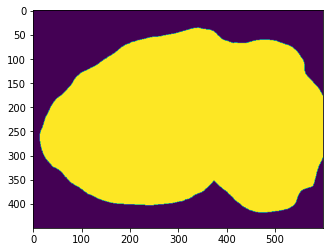

In [99]:
plt.imshow(mask_50[20])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

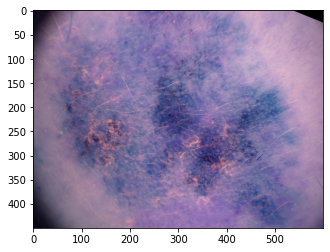

In [85]:
# c = "data\HAM10000/ISIC_0024400.jpg"
# a = "data\HAM10000_segmentations/ISIC_0024400_segmentation.png"
# a = cv2.imread(a, IMREAD_GRAYSCALE)
c = cv2.imread(c)
plt.imshow(c/255)
plt.show

In [80]:
a = "data\HAM10000_segmentations/ISIC_0024400_segmentation.png"
a = cv2.imread(a, IMREAD_GRAYSCALE)
a = np.concatenate(a)
a = a/255
len(a)
(a).sum() / len(a) * 100

72.40037037037037

In [76]:
a = np.concatenate(mask)
len(a)
for i in a/255:
    if i < 1 and i > 0:
        print(i)

In [75]:
((mask/255).sum() / len(a)) * 100

7.930740740740741